<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_cluster_data_multi_delta_(2_4)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_2.4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_2.4_n20.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,71.425910,83.120077,50.496371,98.157827,301.440690,614.640875,365.982011,248.658863
1,0.0,1.0,89.675758,90.259043,45.915242,22.115421,-49.712936,208.252528,258.012114,-49.759586
2,0.0,2.0,55.398382,38.443463,37.288793,35.429788,-4.584337,171.976088,110.637475,61.338614
3,0.0,3.0,73.507087,57.425484,67.603294,34.284640,-14.857283,227.963222,232.774658,-4.811436
4,0.0,4.0,50.061663,95.052634,61.126121,32.142974,-261.195272,-12.811879,175.625643,-188.437522
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,38.776034,40.589850,66.209388,78.370770,47.469644,281.415687,238.876851,42.538836
19996,999.0,16.0,74.833878,79.306900,38.135674,70.451690,-227.106746,45.621396,311.875435,-266.254039
19997,999.0,17.0,36.773620,91.592024,31.888677,40.473727,67.242372,277.970419,211.596810,66.373610
19998,999.0,18.0,42.582497,81.281073,51.699744,29.057645,217.263415,431.884375,223.303117,208.581258


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4           e  \
rep   index                                                           
0.0   0.0    71.425910  83.120077  50.496371  98.157827  301.440690   
      1.0    89.675758  90.259043  45.915242  22.115421  -49.712936   
      2.0    55.398382  38.443463  37.288793  35.429788   -4.584337   
      3.0    73.507087  57.425484  67.603294  34.284640  -14.857283   
      4.0    50.061663  95.052634  61.126121  32.142974 -261.195272   
...                ...        ...        ...        ...         ...   
999.0 15.0   38.776034  40.589850  66.209388  78.370770   47.469644   
      16.0   74.833878  79.306900  38.135674  70.451690 -227.106746   
      17.0   36.773620  91.592024  31.888677  40.473727   67.242372   
      18.0   42.582497  81.281073  51.699744  29.057645  217.263415   
      19.0   91.298882  93.410467  96.673222  61.870300  311.987138   

                      Y       y_hat       e_hat  
rep   index                                      
0.0   0.0    614.640875  365.982011  248.658863  
      1.0    208.252528  258.012114  -49.759586  
      2.0    171.976088  110.637475   61.338614  
      3.0    227.963222  232.774658   -4.811436  
      4.0    -12.811879  175.625643 -188.437522  
...                 ...         ...         ...  
999.0 15.0   281.415687  238.876851   42.538836  
      16.0    45.621396  311.875435 -266.254039  
      17.0   277.970419  211.596810   66.373610  
      18.0   431.884375  223.303117  208.581258  
      19.0   665.240008  433.091009  232.148999  

[20000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4           e  \
rep   index                                                           
0.0   0.0    71.425910  83.120077  50.496371  98.157827  301.440690   
      1.0    89.675758  90.259043  45.915242  22.115421  -49.712936   
      2.0    55.398382  38.443463  37.288793  35.429788   -4.584337   
      3.0    73.507087  57.425484  67.603294  34.284640  -14.857283   
      4.0    50.061663  95.052634  61.126121  32.142974 -261.195272   
...                ...        ...        ...        ...         ...   
999.0 15.0   38.776034  40.589850  66.209388  78.370770   47.469644   
      16.0   74.833878  79.306900  38.135674  70.451690 -227.106746   
      17.0   36.773620  91.592024  31.888677  40.473727   67.242372   
      18.0   42.582497  81.281073  51.699744  29.057645  217.263415   
      19.0   91.298882  93.410467  96.673222  61.870300  311.987138   

                      Y       y_hat       e_hat  
rep   index                                      
0.0   0.0    614.640875  365.982011  248.658863  
      1.0    208.252528  258.012114  -49.759586  
      2.0    171.976088  110.637475   61.338614  
      3.0    227.963222  232.774658   -4.811436  
      4.0    -12.811879  175.625643 -188.437522  
...                 ...         ...         ...  
999.0 15.0   281.415687  238.876851   42.538836  
      16.0    45.621396  311.875435 -266.254039  
      17.0   277.970419  211.596810   66.373610  
      18.0   431.884375  223.303117  208.581258  
      19.0   665.240008  433.091009  232.148999  

[20000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,71.425910,83.120077,50.496371,98.157827,301.440690,614.640875,365.982011,248.658863
1,0.0,1.0,89.675758,90.259043,45.915242,22.115421,-49.712936,208.252528,258.012114,-49.759586
2,0.0,2.0,55.398382,38.443463,37.288793,35.429788,-4.584337,171.976088,110.637475,61.338614
3,0.0,3.0,73.507087,57.425484,67.603294,34.284640,-14.857283,227.963222,232.774658,-4.811436
4,0.0,4.0,50.061663,95.052634,61.126121,32.142974,-261.195272,-12.811879,175.625643,-188.437522
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,38.776034,40.589850,66.209388,78.370770,47.469644,281.415687,238.876851,42.538836
19996,999.0,16.0,74.833878,79.306900,38.135674,70.451690,-227.106746,45.621396,311.875435,-266.254039
19997,999.0,17.0,36.773620,91.592024,31.888677,40.473727,67.242372,277.970419,211.596810,66.373610
19998,999.0,18.0,42.582497,81.281073,51.699744,29.057645,217.263415,431.884375,223.303117,208.581258


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4           e  \
rep   index                                                           
0.0   0.0    71.425910  83.120077  50.496371  98.157827  301.440690   
      1.0    89.675758  90.259043  45.915242  22.115421  -49.712936   
      2.0    55.398382  38.443463  37.288793  35.429788   -4.584337   
      3.0    73.507087  57.425484  67.603294  34.284640  -14.857283   
      4.0    50.061663  95.052634  61.126121  32.142974 -261.195272   
...                ...        ...        ...        ...         ...   
999.0 15.0   38.776034  40.589850  66.209388  78.370770   47.469644   
      16.0   74.833878  79.306900  38.135674  70.451690 -227.106746   
      17.0   36.773620  91.592024  31.888677  40.473727   67.242372   
      18.0   42.582497  81.281073  51.699744  29.057645  217.263415   
      19.0   91.298882  93.410467  96.673222  61.870300  311.987138   

                      Y       y_hat       e_hat  
rep   index                                      
0.0   0.0    614.640875  365.982011  248.658863  
      1.0    208.252528  258.012114  -49.759586  
      2.0    171.976088  110.637475   61.338614  
      3.0    227.963222  232.774658   -4.811436  
      4.0    -12.811879  175.625643 -188.437522  
...                 ...         ...         ...  
999.0 15.0   281.415687  238.876851   42.538836  
      16.0    45.621396  311.875435 -266.254039  
      17.0   277.970419  211.596810   66.373610  
      18.0   431.884375  223.303117  208.581258  
      19.0   665.240008  433.091009  232.148999  

[20000 rows x 8 columns]

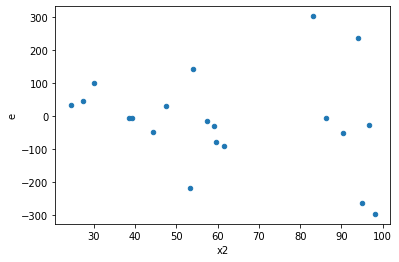

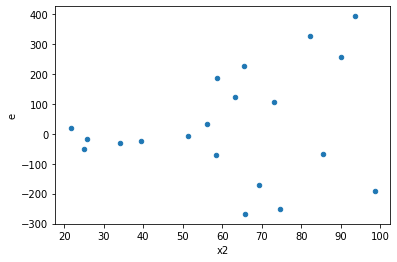

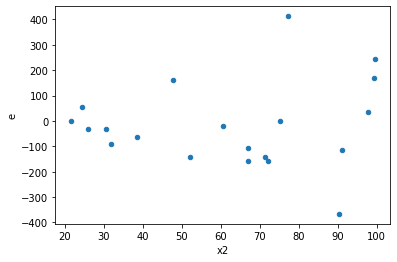

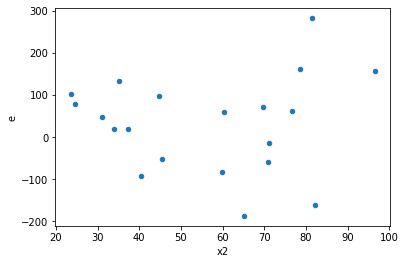

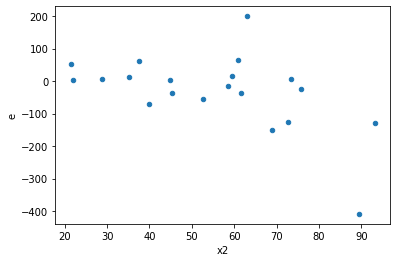

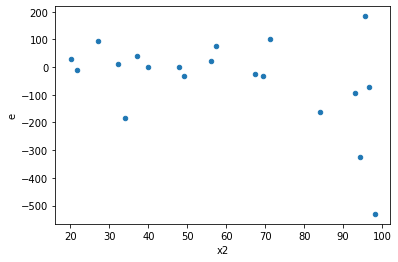

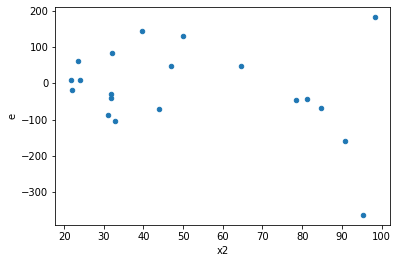

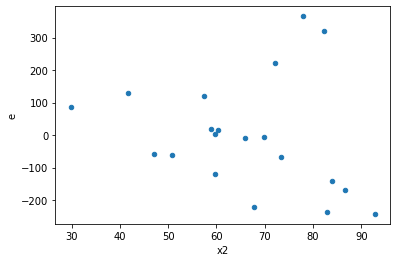

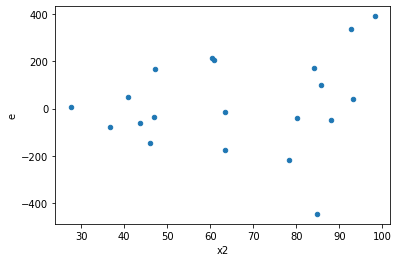

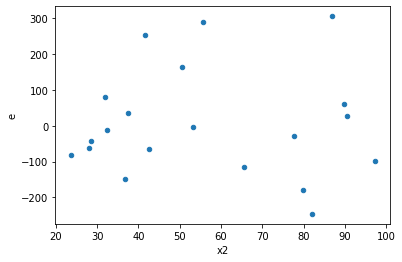

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[['x1', 'x2', 'x3', 'x4']]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,8.0,4.0,33916.321993738195,163419.81301744844,4239.540249217274,40854.95325436211,9.636647101511764,0.04403578608866732,0.9779821069556663,0.02201789304433366,Reject001=1 : Homoscedasticity
1.0,8.0,4.0,124092.83544327153,125586.5907827058,15511.604430408941,31396.64769567645,2.0240748039014247,0.5176358618850714,0.7411820690574643,0.2588179309425357,Reject001=1 : Homoscedasticity
6.0,7.0,5.0,49356.99327466565,136419.62266666617,7050.99903923795,27283.924533333233,3.8695118778915614,0.15548726730195206,0.922256366349024,0.07774363365097603,Reject001=1 : Homoscedasticity
7.0,3.0,9.0,46472.17303355451,375158.91963319754,15490.724344518168,41684.32440368862,2.690921578398611,0.21825580090045227,0.8908720995497739,0.10912790045022613,Reject001=1 : Homoscedasticity
12.0,4.0,8.0,63712.31049155131,131385.34228127293,15928.077622887828,16423.167785159116,1.0310828572030482,0.8949437107366665,0.5525281446316668,0.4474718553683332,Reject001=1 : Homoscedasticity
14.0,5.0,7.0,28309.956369295065,189630.72748006176,5661.991273859013,27090.10392572311,4.784554163973385,0.06412414397783928,0.9679379280110804,0.03206207198891964,Reject001=1 : Homoscedasticity
17.0,6.0,6.0,17105.061012183938,35246.399635039146,2850.8435020306565,5874.399939173191,2.060583099348966,0.400398228924959,0.7998008855375205,0.2001991144624795,Reject001=1 : Homoscedasticity
19.0,8.0,4.0,84467.60954926313,73084.79859930572,10558.451193657891,18271.19964982643,1.7304810444927121,0.6256591640346558,0.6871704179826721,0.3128295820173279,Reject001=1 : Homoscedasticity
20.0,1.0,11.0,3.804707700317149e-25,68810.26933951976,3.804707700317149e-25,6255.479030865433,1.6441418168191988e+28,0.0,1.0,0.0,Reject001=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,8.0,4.0,33916.321993738195,163419.81301744844,4239.540249217274,40854.95325436211,9.636647101511764,0.04403578608866732,Reject001=1 : Homoscedasticity
1.0,8.0,4.0,124092.83544327153,125586.5907827058,15511.604430408941,31396.64769567645,2.0240748039014247,0.5176358618850714,Reject001=1 : Homoscedasticity
2.0,6.0,6.0,230997.40990977804,36579.22876979367,38499.56831829634,6096.538128298945,0.15835341523561075,0.04119148060709084,Reject001=1 : Homoscedasticity
3.0,2.0,10.0,64684.357931825834,55783.92287221632,32342.178965912917,5578.392287221632,0.17248040996560515,0.31194829556158177,Reject001=1 : Homoscedasticity
4.0,7.0,5.0,86116.03437107471,2823.185488201714,12302.290624439245,564.6370976403429,0.04589690772860276,0.0007809940393876815,Reject001=0 : Heteroscedasticity
5.0,4.0,8.0,101999.75566787928,46794.88410463551,25499.93891696982,5849.3605130794385,0.22938723626458488,0.17143517118261045,Reject001=1 : Homoscedasticity
6.0,7.0,5.0,49356.99327466565,136419.62266666617,7050.99903923795,27283.924533333233,3.8695118778915614,0.15548726730195206,Reject001=1 : Homoscedasticity
7.0,3.0,9.0,46472.17303355451,375158.91963319754,15490.724344518168,41684.32440368862,2.690921578398611,0.21825580090045227,Reject001=1 : Homoscedasticity
8.0,8.0,4.0,84740.56756072096,10385.143175667949,10592.57094509012,2596.285793916987,0.24510440452800747,0.08627951028956668,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      816
Reject001=0 : Heteroscedasticity    184
Name: Result_test, dtype: int64